In [54]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [45]:
train=pd.read_csv('train_2016_v2.csv',parse_dates=["transactiondate"])

In [46]:
train.shape

(90275, 3)

In [47]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


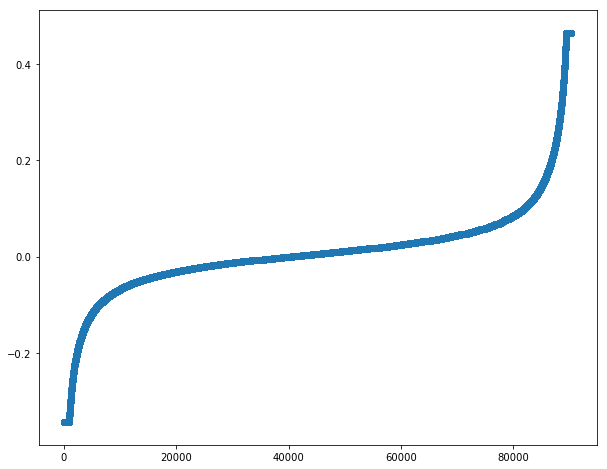

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(range(train.shape[0]),np.sort(train.logerror.values))

In [49]:
ulimit=np.percentile(train.logerror,99)
llimit=np.percentile(train.logerror,1)

In [52]:
train['logerror'].loc[train['logerror']>ulimit]=ulimit
train['logerror'].loc[train['logerror']<llimit]=llimit

/Users/prabha/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


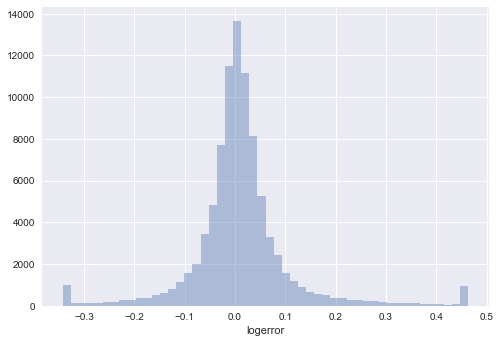

In [59]:
sns.distplot(train.logerror,bins=50,kde=False)

In [68]:
train['transactionmonth']=train.transactiondate.dt.month

In [69]:
train.dtypes

parcelid                     int64
logerror                   float64
transactiondate     datetime64[ns]
transactionmonth             int64
dtype: object

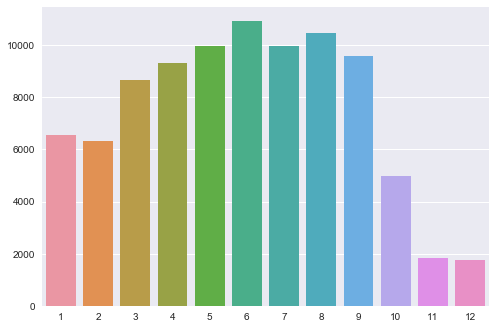

In [76]:
cnt=train['transactionmonth'].value_counts()
sns.barplot(cnt.index,cnt.values)